In [1]:
%run ../../utils/commonImports.py
%run ../../utils/tradingImports.py
%matplotlib inline

# Load data

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = load_split("D:\\Dropbox\\My work\\krypl-project\\dataSplit\\return-01-within-day")

In [5]:
from sklearn.externals import joblib
from modeling.gridsearch import GridSearch

path = "D:\\Dropbox\\My work\\krypl-project\\models\\return-01-loss-01-within-day"
grid_search = joblib.load(f'{path}\\tree_search.pkl')

# Prediction on validation set

In [6]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

confusion_matrixes = []
precisions = []
recalls = []
for clf in grid_search.clfs:
    y_pred = clf.predict(X_val)
    confusion_matrixes.append(confusion_matrix(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred))
    recalls.append(recall_score(y_val, y_pred))

# Precision - recall

Text(0,0.5,'recall')

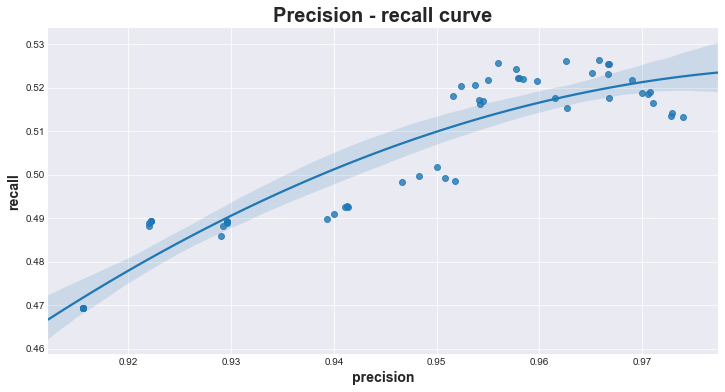

In [7]:
plt.figure(figsize=[12, 6])
sns.regplot(np.array(precisions), np.array(recalls), order=2)
plt.title('Precision - recall curve', fontproperties=title_font)
plt.xlabel('precision', fontproperties=axis_font)
plt.ylabel('recall', fontproperties=axis_font)

# ROC curve

In [8]:
def cm_parts(conf_mat):
    TN = conf_mat[0, 0]
    FN = conf_mat[1, 0]
    FP = conf_mat[0, 1]
    TP = conf_mat[1, 1]
    return TN, FN, FP, TP


def fpr(conf_mat):
    TN, FN, FP, TP = cm_parts(conf_mat)
    return FP / (FP + TN)

# TN = 1, FN = 2, FP = 3, TP = 4
y = [0, 0,  0, 1, 1, 1, 1, 1, 1, 1]
y_true = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]
conf_mat = confusion_matrix(y_true, y)
np.testing.assert_array_equal(conf_mat, np.array([[1, 3], 
                                                  [2, 4]]))
TN, FN, FP, TP = cm_parts(conf_mat)
assert TN == 1
assert FN == 2
assert FP == 3
assert TP == 4

assert fpr(conf_mat) == (3 / (3+1))

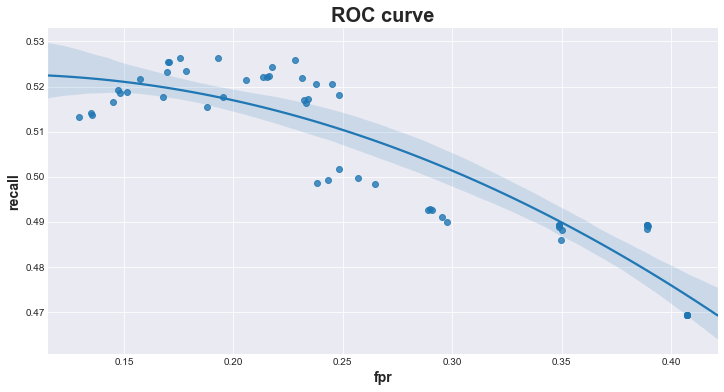

In [9]:
fprs = [fpr(conf_mat) for conf_mat in confusion_matrixes]
plt.figure(figsize=[12, 6])
sns.regplot(np.array(fprs), np.array(recalls), order=2)
plt.title('ROC curve', fontproperties=title_font)
plt.xlabel('fpr', fontproperties=axis_font)
plt.ylabel('recall', fontproperties=axis_font);

# Features importance

In [10]:
stats = pd.DataFrame({
        'precision': precisions,
        'recall': recalls,
        'fpr': fprs
    })

stats.sort_values('fpr')

,precision,recall,fpr
45,0.9739,0.5133,0.1294
50,0.9729,0.5142,0.1348
40,0.9728,0.5136,0.1354
35,0.9711,0.5165,0.1449
51,0.9708,0.5191,0.1473
46,0.9706,0.5185,0.1482
41,0.9699,0.5188,0.1514
36,0.9690,0.5218,0.1574
30,0.9667,0.5177,0.1678
42,0.9667,0.5233,0.1699


In [11]:
clf = grid_search.clfs[45]

In [12]:
features = X_val.columns
importances = clf.feature_importances_
importances_df = pd.DataFrame({'feature': features, 'importance': importances})
importances_df.sort_values('importance', ascending=False)

,feature,importance
9,ac288,0.1171
15,vol2016,0.1114
13,vol36,0.0898
14,vol288,0.0873
8,ac36,0.0851
16,dv_36_288,0.0810
5,pma36,0.0673
7,ma_36_288,0.0485
6,ma_12_108,0.0456
12,zscore_2016_volume,0.0413


In [11]:
top_features = importances_df.sort_values('importance', ascending=False)['feature'].head(6)
top_features.values

array(['vol2016', 'ac288', 'vol288', 'ac36', 'return', 'dv_36_288'],
      dtype=object)

# Evaluation on test set

In [13]:
clf = grid_search.clfs[45]

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

def cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, columns=['predicted_0', 'predicted_1'], index=['true_0', 'true_1'])
    return cm


def eval(clf, X, y_true):
    y_pred = clf.predict(X)
    report = classification_report(y_true, y_pred)
    conf_matrix = cm(y_true, y_pred)
    print(conf_matrix, end='\n\n')
    print(f'Precison: %.3f' % precision_score(y_true, y_pred))
    print(f'Recall: %.3f' % recall_score(y_true, y_pred))
    print(f'FPR: %.3f' % fpr(conf_matrix.values))

In [15]:
eval(clf, X_val, y_val)

        predicted_0  predicted_1
true_0         2926          435
true_1        15406        16248

Precison: 0.974
Recall: 0.513
FPR: 0.129


In [16]:
eval(clf, X_test, y_test)

        predicted_0  predicted_1
true_0         4497          652
true_1        22527        24585

Precison: 0.974
Recall: 0.522
FPR: 0.127


In [17]:
joblib.dump(clf, f'{path}\\tree_selected_01.pkl');

# Export Tree

In [67]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot')